<a href="https://colab.research.google.com/github/guybrush1989/DMT-Group80/blob/master/benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls '/content/drive/My Drive/Group 80 - DTM/assignment1/'

 assignment_1_advanced.pdf     Report.gdoc
 dataset_mood_smartphone.csv  'Scientific explanation algorithms DSS.docx'
'General Summary.gdoc'	       sources
 Log.gdoc


In [0]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Group 80 - DTM/assignment1/dataset_mood_smartphone.csv')

In [4]:
df.head(5)

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [0]:
df = df[['id','time','variable','value']]

In [6]:
df_mood = df.loc[df['variable'] == 'mood']
df_mood

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,AS14.01,2014-02-27 09:00:00.000,mood,6.0
...,...,...,...,...
5636,AS14.33,2014-05-30 09:00:00.000,mood,8.0
5637,AS14.33,2014-05-30 13:00:00.000,mood,6.0
5638,AS14.33,2014-05-30 19:00:00.000,mood,8.0
5639,AS14.33,2014-05-30 20:00:00.000,mood,6.0


In [0]:
import numpy as np

df_mood = df_mood.drop(columns=['variable'])
df_mood = df_mood.rename(columns={'value':'mood'})

df_mood['moodAvg'] = np.nan
df_mood['moodPred'] = np.nan

In [8]:
df_mood.loc[df_mood['time']=='2014-04-17 11:00:00.000']

,id,time,mood,moodAvg,moodPred
135,AS14.01,2014-04-17 11:00:00.000,7.0,NaN,NaN
136,AS14.01,2014-04-17 11:00:00.000,6.0,NaN,NaN
5380,AS14.32,2014-04-17 11:00:00.000,8.0,NaN,NaN


In [0]:
df_mood = df_mood.drop_duplicates(subset=['id','time'], keep='last').reset_index(drop=True)

In [10]:
df_mood.loc[df_mood['time']=='2014-04-17 11:00:00.000']

,id,time,mood,moodAvg,moodPred
135,AS14.01,2014-04-17 11:00:00.000,6.0,NaN,NaN
5368,AS14.32,2014-04-17 11:00:00.000,8.0,NaN,NaN


In [11]:
for index in df_mood.index:
  df_mood.iloc[index,1] = pd.to_datetime(df_mood.iloc[index,1]).date()

df_mood

,id,time,mood,moodAvg,moodPred
0,AS14.01,2014-02-26,6.0,NaN,NaN
1,AS14.01,2014-02-26,6.0,NaN,NaN
2,AS14.01,2014-02-26,6.0,NaN,NaN
3,AS14.01,2014-02-26,7.0,NaN,NaN
4,AS14.01,2014-02-27,6.0,NaN,NaN
...,...,...,...,...,...
5623,AS14.33,2014-05-30,8.0,NaN,NaN
5624,AS14.33,2014-05-30,6.0,NaN,NaN
5625,AS14.33,2014-05-30,8.0,NaN,NaN
5626,AS14.33,2014-05-30,6.0,NaN,NaN


In [12]:
df_mood.loc[df_mood['id']==df_mood.iloc[0,0]][df_mood['time']==df_mood.iloc[0,1]]['mood'].agg('mean')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


6.25

In [13]:
for index in df_mood.index:
  df_mood.iloc[index,3] = df_mood.loc[df_mood['id']==df_mood.iloc[index,0]][df_mood['time']==df_mood.iloc[index,1]]['mood'].agg('mean')

df_mood

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,id,time,mood,moodAvg,moodPred
0,AS14.01,2014-02-26,6.0,6.250000,NaN
1,AS14.01,2014-02-26,6.0,6.250000,NaN
2,AS14.01,2014-02-26,6.0,6.250000,NaN
3,AS14.01,2014-02-26,7.0,6.250000,NaN
4,AS14.01,2014-02-27,6.0,6.333333,NaN
...,...,...,...,...,...
5623,AS14.33,2014-05-30,8.0,6.800000,NaN
5624,AS14.33,2014-05-30,6.0,6.800000,NaN
5625,AS14.33,2014-05-30,8.0,6.800000,NaN
5626,AS14.33,2014-05-30,6.0,6.800000,NaN


In [14]:
from datetime import date
df_mood.loc[df_mood['time']== date(2014, 4, 17)]

,id,time,mood,moodAvg,moodPred
135,AS14.01,2014-04-17,6.0,6.500000,NaN
136,AS14.01,2014-04-17,7.0,6.500000,NaN
137,AS14.01,2014-04-17,6.0,6.500000,NaN
138,AS14.01,2014-04-17,7.0,6.500000,NaN
356,AS14.02,2014-04-17,5.0,6.666667,NaN
...,...,...,...,...,...
5440,AS14.33,2014-04-17,8.0,7.200000,NaN
5441,AS14.33,2014-04-17,6.0,7.200000,NaN
5442,AS14.33,2014-04-17,7.0,7.200000,NaN
5443,AS14.33,2014-04-17,7.0,7.200000,NaN


In [15]:
df_moodAvg = df_mood.drop(columns=['mood'])
df_moodAvg = df_moodAvg.drop_duplicates(subset=['id','time']).reset_index(drop=True)
df_moodAvg

,id,time,moodAvg,moodPred
0,AS14.01,2014-02-26,6.250000,NaN
1,AS14.01,2014-02-27,6.333333,NaN
2,AS14.01,2014-03-21,6.200000,NaN
3,AS14.01,2014-03-22,6.400000,NaN
4,AS14.01,2014-03-23,6.800000,NaN
...,...,...,...,...
1263,AS14.33,2014-05-27,6.200000,NaN
1264,AS14.33,2014-05-28,8.200000,NaN
1265,AS14.33,2014-05-29,7.000000,NaN
1266,AS14.33,2014-05-30,6.800000,NaN


In [16]:
df_moodAvg['id'].unique()

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

In [0]:
dfs = {'df_moodAvg_' + str(df_moodAvg['id'].unique()[i]):df_moodAvg.loc[df_moodAvg['id'] == df_moodAvg['id'].unique()[i]].reset_index(drop = True) for i in range(0,df_moodAvg['id'].unique().size)}

In [18]:
print(len(dfs))

27


In [19]:
for id in df_moodAvg['id'].unique():
  print(dfs['df_moodAvg_'+id])

         id        time   moodAvg  moodPred
0   AS14.01  2014-02-26  6.250000       NaN
1   AS14.01  2014-02-27  6.333333       NaN
2   AS14.01  2014-03-21  6.200000       NaN
3   AS14.01  2014-03-22  6.400000       NaN
4   AS14.01  2014-03-23  6.800000       NaN
5   AS14.01  2014-03-24  6.000000       NaN
6   AS14.01  2014-03-25  6.750000       NaN
7   AS14.01  2014-03-26  6.600000       NaN
8   AS14.01  2014-03-27  7.000000       NaN
9   AS14.01  2014-03-28  6.400000       NaN
10  AS14.01  2014-03-29  8.000000       NaN
11  AS14.01  2014-03-30  7.500000       NaN
12  AS14.01  2014-03-31  7.400000       NaN
13  AS14.01  2014-04-01  6.000000       NaN
14  AS14.01  2014-04-02  6.500000       NaN
15  AS14.01  2014-04-03  6.400000       NaN
16  AS14.01  2014-04-04  6.200000       NaN
17  AS14.01  2014-04-05  6.800000       NaN
18  AS14.01  2014-04-06  6.500000       NaN
19  AS14.01  2014-04-07  6.500000       NaN
20  AS14.01  2014-04-08  6.600000       NaN
21  AS14.01  2014-04-09  7.40000

In [20]:
for id in df_moodAvg['id'].unique():
  dfs['df_moodAvg_'+id]['moodPred'] = dfs['df_moodAvg_'+id]['moodAvg'].shift(periods=1)
  print(dfs['df_moodAvg_'+id])

         id        time   moodAvg  moodPred
0   AS14.01  2014-02-26  6.250000       NaN
1   AS14.01  2014-02-27  6.333333  6.250000
2   AS14.01  2014-03-21  6.200000  6.333333
3   AS14.01  2014-03-22  6.400000  6.200000
4   AS14.01  2014-03-23  6.800000  6.400000
5   AS14.01  2014-03-24  6.000000  6.800000
6   AS14.01  2014-03-25  6.750000  6.000000
7   AS14.01  2014-03-26  6.600000  6.750000
8   AS14.01  2014-03-27  7.000000  6.600000
9   AS14.01  2014-03-28  6.400000  7.000000
10  AS14.01  2014-03-29  8.000000  6.400000
11  AS14.01  2014-03-30  7.500000  8.000000
12  AS14.01  2014-03-31  7.400000  7.500000
13  AS14.01  2014-04-01  6.000000  7.400000
14  AS14.01  2014-04-02  6.500000  6.000000
15  AS14.01  2014-04-03  6.400000  6.500000
16  AS14.01  2014-04-04  6.200000  6.400000
17  AS14.01  2014-04-05  6.800000  6.200000
18  AS14.01  2014-04-06  6.500000  6.800000
19  AS14.01  2014-04-07  6.500000  6.500000
20  AS14.01  2014-04-08  6.600000  6.500000
21  AS14.01  2014-04-09  7.40000

In [21]:
for id in df_moodAvg['id'].unique():
  print(dfs['df_moodAvg_'+id].shape[0])
  print(int(dfs['df_moodAvg_'+id].shape[0]/5))
  print('-----')

47
9
-----
41
8
-----
47
9
-----
53
10
-----
45
9
-----
48
9
-----
62
12
-----
46
9
-----
41
8
-----
53
10
-----
44
8
-----
55
11
-----
53
10
-----
56
11
-----
46
9
-----
47
9
-----
39
7
-----
55
11
-----
30
6
-----
68
13
-----
42
8
-----
38
7
-----
42
8
-----
47
9
-----
43
8
-----
37
7
-----
43
8
-----


In [22]:
for id in df_moodAvg['id'].unique():
  print(dfs['df_moodAvg_'+id].tail(int(dfs['df_moodAvg_'+id].shape[0]/5)))
  print('-----')

         id        time  moodAvg  moodPred
38  AS14.01  2014-04-26      7.6       7.2
39  AS14.01  2014-04-27      7.5       7.6
40  AS14.01  2014-04-28      7.6       7.5
41  AS14.01  2014-04-29      7.0       7.6
42  AS14.01  2014-04-30      7.8       7.0
43  AS14.01  2014-05-01      8.0       7.8
44  AS14.01  2014-05-02      7.6       8.0
45  AS14.01  2014-05-03      8.0       7.6
46  AS14.01  2014-05-04      8.0       8.0
-----
         id        time   moodAvg  moodPred
33  AS14.02  2014-04-18  6.500000  6.666667
34  AS14.02  2014-04-19  5.666667  6.500000
35  AS14.02  2014-04-20  5.000000  5.666667
36  AS14.02  2014-04-21  6.000000  5.000000
37  AS14.02  2014-04-22  5.666667  6.000000
38  AS14.02  2014-04-23  5.500000  5.666667
39  AS14.02  2014-04-24  7.000000  5.500000
40  AS14.02  2014-04-25  9.000000  7.000000
-----
         id        time   moodAvg  moodPred
38  AS14.03  2014-04-28  7.000000      7.60
39  AS14.03  2014-04-29  7.200000      7.00
40  AS14.03  2014-04-30  7.000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

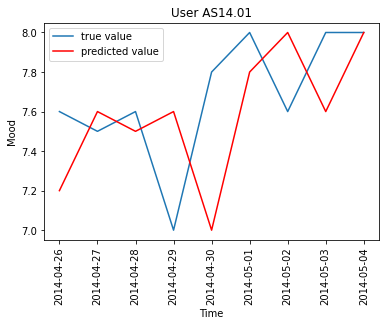

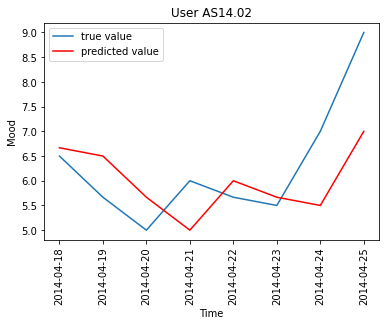

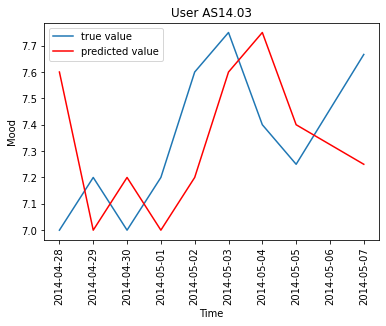

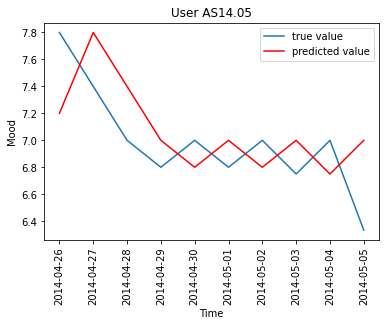

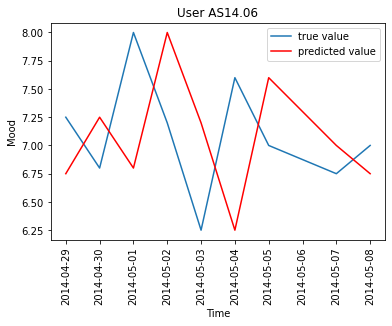

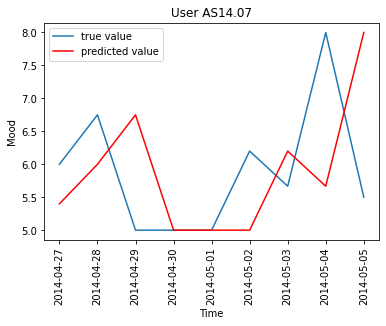

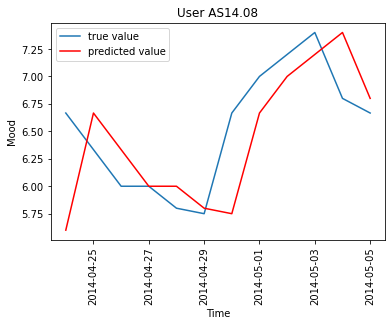

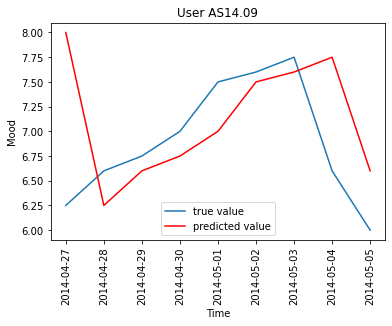

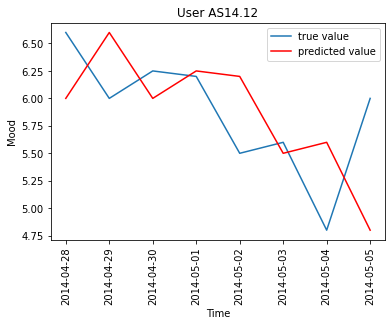

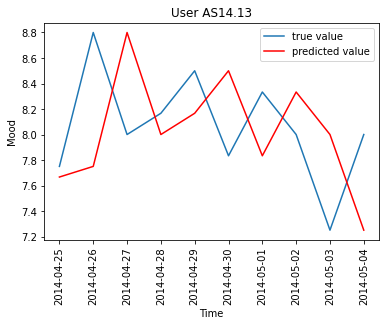

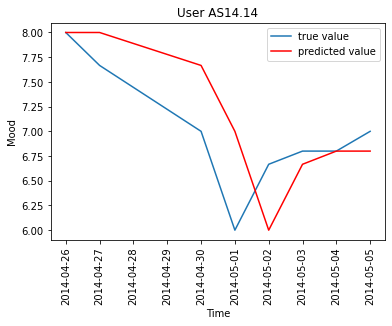

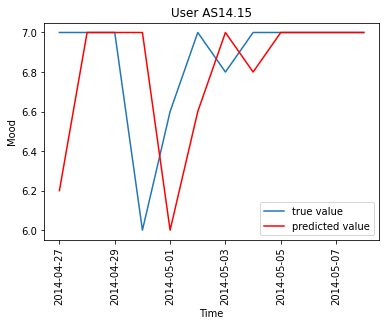

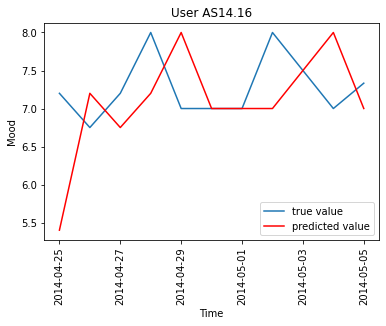

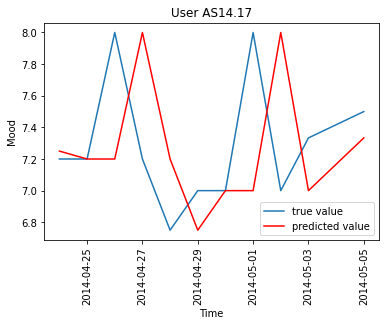

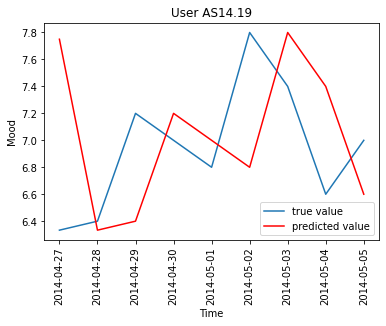

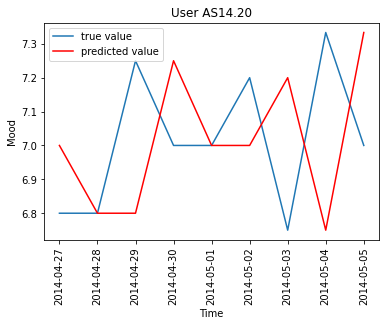

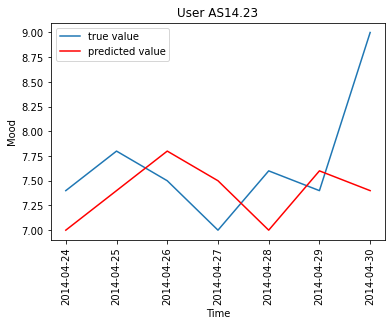

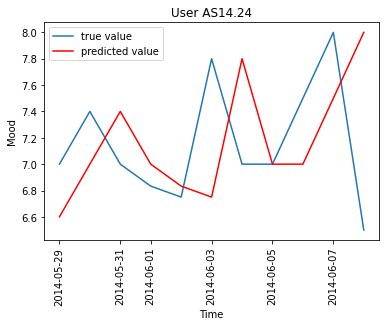

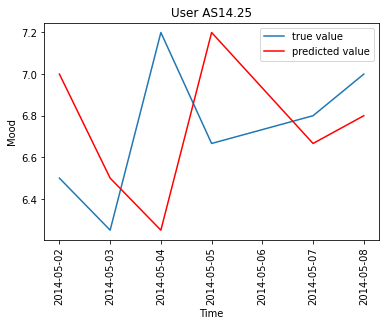

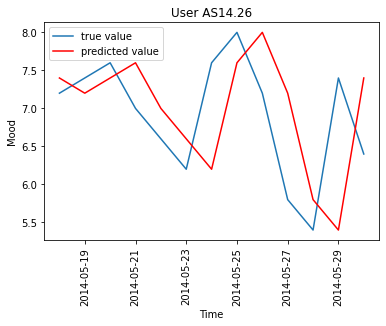

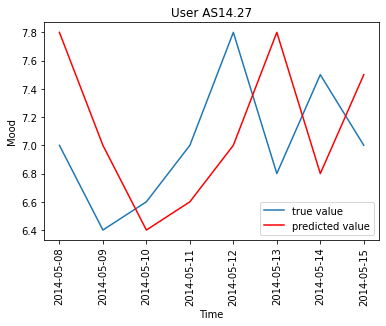

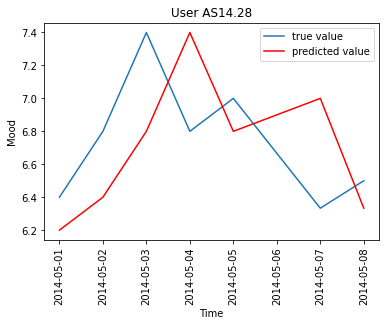

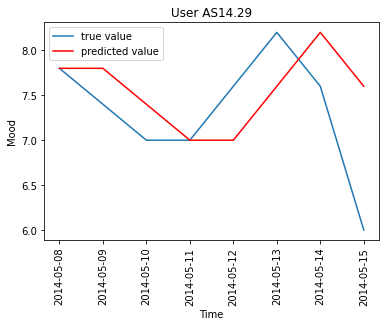

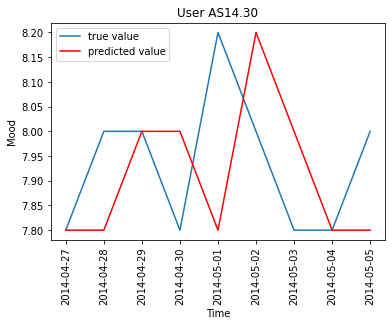

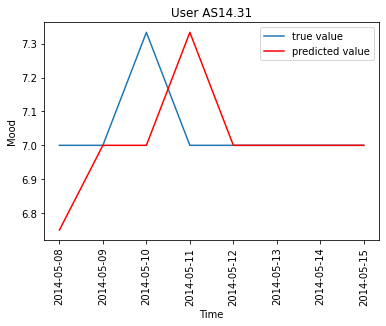

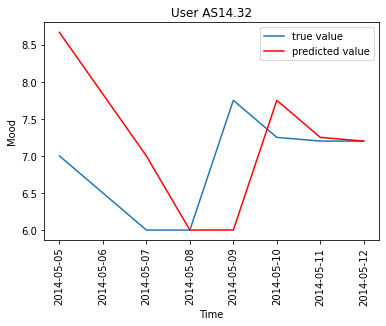

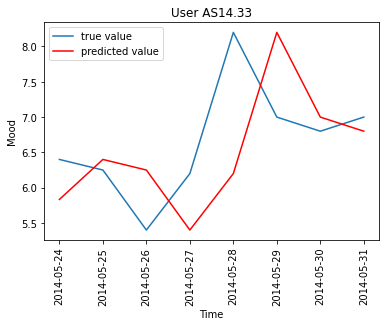

In [42]:
import matplotlib.pyplot as plt

for id in df_moodAvg['id'].unique():
  plt.figure(id)
  plt.title('User ' + id)
  plt.xlabel('Time')
  plt.ylabel('Mood')
  plt.xticks(rotation=90)
  plt.plot(dfs['df_moodAvg_'+id].tail(int(dfs['df_moodAvg_'+id].shape[0]/5)).time, dfs['df_moodAvg_'+id].tail(int(dfs['df_moodAvg_'+id].shape[0]/5)).moodAvg, label='true value')
  plt.plot(dfs['df_moodAvg_'+id].tail(int(dfs['df_moodAvg_'+id].shape[0]/5)).time, dfs['df_moodAvg_'+id].tail(int(dfs['df_moodAvg_'+id].shape[0]/5)).moodPred, label='predicted value', color='r')
  plt.legend()

In [0]:
y = dfs['df_moodAvg_AS14.01'].tail(int(dfs['df_moodAvg_AS14.01'].shape[0]/5)).loc[:,'moodPred']

In [0]:
x = dfs['df_moodAvg_AS14.01'].tail(int(dfs['df_moodAvg_AS14.01'].shape[0]/5)).loc[:,'moodAvg']

In [25]:
import statsmodels.api as sm

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                                 OLS Regression Results                                
Dep. Variable:               moodPred   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2853.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):                    1.67e-11
Time:                        19:06:42   Log-Likelihood:                         -4.5602
No. Observations:                   9   AIC:                                      11.12
Df Residuals:                       8   BIC:                                      11.32
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [30]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y,x)

0.17111111111111102

In [31]:
import math
import numpy as np

loss= pd.DataFrame(columns=['id', 'mse', 'rmse'])
for id in df_moodAvg['id'].unique():
  #loss = loss.append({'id':id, 'mse':format(mse(dfs['df_moodAvg_' + id].tail(int(dfs['df_moodAvg_' + id].shape[0]/5)).loc[:,'moodPred'],dfs['df_moodAvg_' + id].tail(int(dfs['df_moodAvg_' + id].shape[0]/5)).loc[:,'moodAvg']), '.4f')}, ignore_index=True)
  mse = mean_squared_error(dfs['df_moodAvg_' + id].tail(int(dfs['df_moodAvg_' + id].shape[0]/5)).loc[:,'moodPred'],dfs['df_moodAvg_' + id].tail(int(dfs['df_moodAvg_' + id].shape[0]/5)).loc[:,'moodAvg'])
  rmse = math.sqrt(mse)
  loss = loss.append({'id':id, 'mse':mse, 'rmse':rmse}, ignore_index=True)
  print('MSE ' + str(id) + ': ' + str(format(mean_squared_error(dfs['df_moodAvg_' + id].tail(int(dfs['df_moodAvg_' + id].shape[0]/5)).loc[:,'moodPred'],dfs['df_moodAvg_' + id].tail(int(dfs['df_moodAvg_' + id].shape[0]/5)).loc[:,'moodAvg']), '.4f')))
  print('-----')

MSE AS14.01: 0.1711
-----
MSE AS14.02: 1.0694
-----
MSE AS14.03: 0.1090
-----
MSE AS14.05: 0.1409
-----
MSE AS14.06: 0.6381
-----
MSE AS14.07: 1.9338
-----
MSE AS14.08: 0.2343
-----
MSE AS14.09: 0.5817
-----
MSE AS14.12: 0.4206
-----
MSE AS14.13: 0.3819
-----
MSE AS14.14: 0.2572
-----
MSE AS14.15: 0.2036
-----
MSE AS14.16: 0.7396
-----
MSE AS14.17: 0.3351
-----
MSE AS14.19: 0.5213
-----
MSE AS14.20: 0.1110
-----
MSE AS14.23: 0.5171
-----
MSE AS14.24: 0.4552
-----
MSE AS14.25: 0.2595
-----
MSE AS14.26: 0.8215
-----
MSE AS14.27: 0.4475
-----
MSE AS14.28: 0.2046
-----
MSE AS14.29: 0.4950
-----
MSE AS14.30: 0.0400
-----
MSE AS14.31: 0.0356
-----
MSE AS14.32: 1.0133
-----
MSE AS14.33: 0.9033
-----


In [32]:
print(loss)

         id       mse      rmse
0   AS14.01  0.171111  0.413656
1   AS14.02  1.069444  1.034139
2   AS14.03  0.109012  0.330170
3   AS14.05  0.140944  0.375426
4   AS14.06  0.638056  0.798784
5   AS14.07  1.933765  1.390599
6   AS14.08  0.234306  0.484051
7   AS14.09  0.581667  0.762671
8   AS14.12  0.420625  0.648556
9   AS14.13  0.381889  0.617972
10  AS14.14  0.257222  0.507171
11  AS14.15  0.203636  0.451261
12  AS14.16  0.739611  0.860006
13  AS14.17  0.335126  0.578901
14  AS14.19  0.521265  0.721987
15  AS14.20  0.110988  0.333148
16  AS14.23  0.517143  0.719126
17  AS14.24  0.455202  0.674687
18  AS14.25  0.259537  0.509448
19  AS14.26  0.821538  0.906388
20  AS14.27  0.447500  0.668954
21  AS14.28  0.204603  0.452331
22  AS14.29  0.495000  0.703562
23  AS14.30  0.040000  0.200000
24  AS14.31  0.035590  0.188654
25  AS14.32  1.013254  1.006605
26  AS14.33  0.903264  0.950402


In [35]:
print(format(loss.loc[:,'mse'].mean(),'4f'))

0.483011


In [36]:
print(format(loss.loc[:,'rmse'].mean(),'4f'))

0.640321
